## **EQ3**

### **Setup the Environment**

In [1]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'


### **Play with the simulator**

#### **Import libraries**

In [ ]:
import os
import pandas as pd
import math

### **Execute simulations**

In [13]:
import subprocess

def simulate(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(1))
        ],
        env=env,
        capture_output=True,
        text=True,
    )


In [ ]:
duration = 86400000 # 1 day in ms
tx_rate = 1e6       #each node transmit a packet every 1000 seconds on average (ms)
for n_nodes in list(range(0,50))+list(range(50, 300, 50)) + list(range(300, 1601, 100)):
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 4, duration)
  simulate(n_nodes, tx_rate, 3, duration)
  simulate(n_nodes, tx_rate, 5, duration)


In [15]:
datasn3 = pd.read_csv("exp4.dat", sep=" ")
datasn4 = pd.read_csv("exp3.dat", sep=" ")
datasn5 = pd.read_csv("exp5.dat", sep=" ")

In [16]:
datasn3["der"] = (datasn3["nrTransmissions"] - datasn3["nrCollisions"]) / datasn3["nrTransmissions"]
datasn4["der"] = (datasn4["nrTransmissions"] - datasn4["nrCollisions"]) / datasn4["nrTransmissions"]
datasn5["der"] = (datasn5["nrTransmissions"] - datasn5["nrCollisions"]) / datasn5["nrTransmissions"]

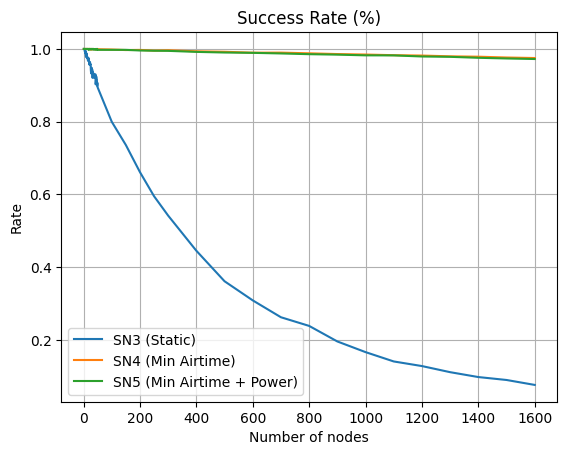

In [17]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(datasn3["#nrNodes"], datasn3["der"], linestyle='-', label='SN3 (Static)')
plt.plot(datasn4["#nrNodes"], datasn4["der"], linestyle='-', label='SN4 (Min Airtime)')
plt.plot(datasn5["#nrNodes"], datasn5["der"], linestyle='-', label='SN5 (Min Airtime + Power)')

plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

### Second part - **Figure 7** of the paper

In [8]:
import os
import subprocess

def simulate2(n_nodes, avg_send_time, exp, duration, nr_bs, collision=1):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    subprocess.run(
        [
            "python2",
            "/content/lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(avg_send_time)),
            str(int(exp)),
            str(int(duration)),
            str(int(nr_bs)),
            str(int(collision)),
        ],
        env=env,
        capture_output=True,
        text=True,
    )

In [ ]:
duration = 86400000 # 1 day in ms
tx_rate = 1e6
nr_bs_list = [1, 2, 3, 4, 8, 24]
exp = 0  # SN1

# Esecuzione simulazioni
for nr_bs in nr_bs_list:
    print(f"\n=== Simulazioni per {nr_bs} base station(s) ===")
    for n_nodes in list(range(0,50))+list(range(50, 300, 50)) + list(range(300, 1601, 100)):
        print(f"→ Simulating {n_nodes} nodes...")
        simulate2(n_nodes, tx_rate, exp, duration, nr_bs, 1)

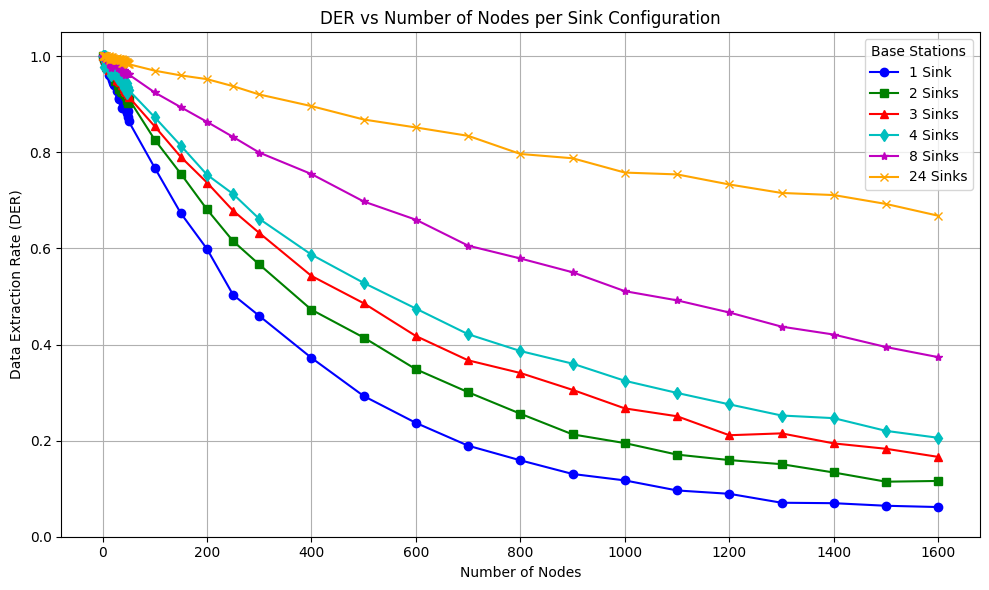

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

nr_bs_list = [1, 2, 3, 4, 8, 24]  # Numero di sink simulati
exp = 0  # Esperimento usato per generare i file
colors = ['b', 'g', 'r', 'c', 'm', 'orange']
markers = ['o', 's', '^', 'd', '*', 'x']

plt.figure(figsize=(10, 6))

for i, nr_bs in enumerate(nr_bs_list):
    fname = f"exp{exp}BS{nr_bs}.dat"
    try:
        df = pd.read_csv(fname, sep=" ", comment="#", names=["nrNodes", "DER"])

        # Plot
        plt.plot(
            df["nrNodes"], df["DER"],
            label=f"{nr_bs} Sink{'s' if nr_bs > 1 else ''}",
            linestyle='-',
            marker=markers[i % len(markers)],
            color=colors[i % len(colors)],
        )
    except Exception as e:
        print(f"Errore con il file {fname}: {e}")

plt.title("DER vs Number of Nodes per Sink Configuration")
plt.xlabel("Number of Nodes")
plt.ylabel("Data Extraction Rate (DER)")
plt.grid(True)
plt.legend(title="Base Stations")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
